In [1]:
# Import libraries necessary for this project
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve

# Load the Boston housing dataset
# TODO: load the csv file
dir = os.getcwd()
in_file = dir + '/housing.csv'
data = pd.read_csv(in_file)  # 讀檔

prices = data['MEDV']  # this is what we want to preict ( target variable )
features = data.drop('MEDV', axis=1)  # remove this feature because it is our target ( features )

# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)  # (平均數)

# TODO: Median price of the data
median_price = np.median(prices)  # (中位數)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)  # (標準差) ddof=0, 母體標準差，分母(n)，有偏估計

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477



Question 1:
圖形驗證:


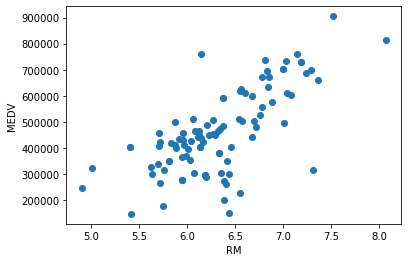

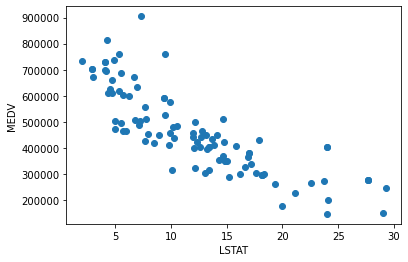

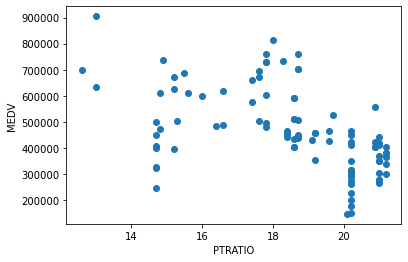

RM與MEDV大致成正比，平均房間數越高，房價應該要越高。
LSTAT與MEDV大致成反比，低收入階層比率越高的地區，房價應該要低(ex: 貧民窟，不會有高級房子)。
PTRATIO與MEDV大致成反比，學生/教師 比例越高，代表一個老師負擔更多學生，經濟越落後。


In [3]:
# Question 1:
# RM = 平均房間數, LSTAT = 區域中被認為是低收入階層的比率
# PTRATIO = 鎮上學生與教師數量比例, MEDV= 房屋的中位數價格
indices = np.random.choice(data.shape[0], 100) # 隨機抽出100個編號
random_pick = data.iloc[indices]  # 取出'indices'值的column
# print("indices: ", indices)
# print("data:\n ", random_pick)  # excel內表格編號+2
print("\n", end='')
print("Question 1:")
print("圖形驗證:")
plt.plot(random_pick['RM'], random_pick['MEDV'], 'o')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

plt.plot(random_pick['LSTAT'], random_pick['MEDV'], 'o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

plt.plot(random_pick['PTRATIO'], random_pick['MEDV'], 'o')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

print("RM與MEDV大致成正比，平均房間數越高，房價應該要越高。")
print("LSTAT與MEDV大致成反比，低收入階層比率越高的地區，房價應該要低(ex: 貧民窟，不會有高級房子)。")
print("PTRATIO與MEDV大致成反比，學生/教師 比例越高，代表一個老師負擔更多學生，經濟越落後。")


Question 2:
Model has a coefficient of determination, R^2, of 0.923.


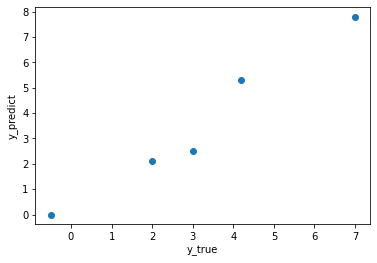

成功，因為圖形接近一直線(值接近1)，非常接近預測值


In [4]:
# Question 2:
def performance_metric(y_true, y_predict):
  score = r2_score(y_true, y_predict)

  return score

y_true = [3, -0.5, 2, 7, 4.2]
y_predict = [2.5, 0.0, 2.1, 7.8, 5.3]
score = performance_metric(y_true, y_predict)
print("\n", end='')
print("Question 2:")
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
plt.plot(y_true, y_predict, 'o')
plt.xlabel('y_true')
plt.ylabel('y_predict')
plt.show()
print("成功，因為圖形接近一直線(值接近1)，非常接近預測值")

In [6]:
print("Question 3:")
# TODO:  Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, shuffle=True)
# Success
if X_train is not None:
  print("Training and testing split was successful.")
  # Print out the shape of training and testing data
  print("X_train shape: ", X_train.shape)
  print("X_test shape: ", X_test.shape)
  print("y_train shape: ", y_train.shape)
  print("y_test shape: ", y_test.shape)
else:
  print("Something wrong. Data are not splitted.")

print("\n", end='')
print("防止Overfitting及Underfitting的問題。")
print("Overfitting: 把過多訓練資料都拿去訓練(類似硬背答案)，導致雖然可能對於訓練資料的結果是好的，但未來若來一筆新的資料則", end='')
print("預測的結果會不準確。")
print("Underfitting: 訓練資料複雜度過低，訓練出來的曲線過於單調，不會有好的預測結果。")

Question 3:
Training and testing split was successful.
X_train shape:  (391, 3)
X_test shape:  (98, 3)
y_train shape:  (391,)
y_test shape:  (98,)

防止Overfitting及Underfitting的問題。
Overfitting: 把過多訓練資料都拿去訓練(類似硬背答案)，導致雖然可能對於訓練資料的結果是好的，但未來若來一筆新的資料則預測的結果會不準確。
Underfitting: 訓練資料複雜度過低，訓練出來的曲線過於單調，不會有好的預測結果。


Question 4:


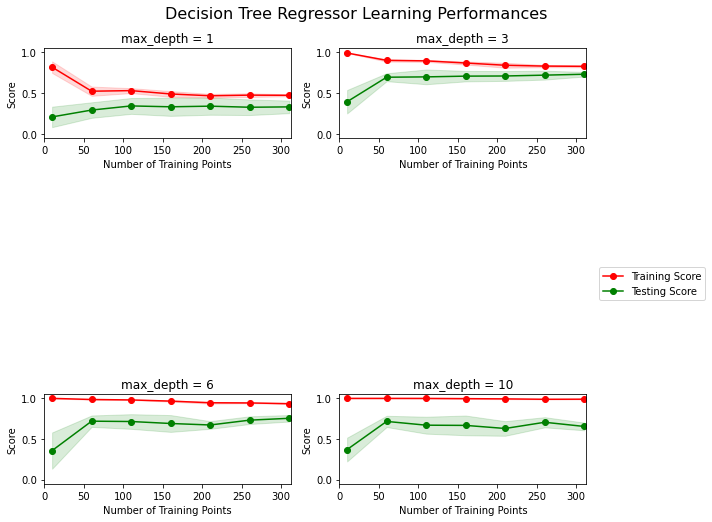

以Training Score來說(深度為1時)，隨著Training Point變多，Score逐漸下降。
Testing Score，隨著Training Point變多，整體來看Score逐漸上升
隨著Training Point越多，對模型沒幫助，因為Training Score與Testing Score沒有一起往1.0靠近。


In [8]:
print("Question 4:")
def learn_model(X, y):
  """ Calculates the performance of several models with varying sizes of training data.
      The learning and testing scores for each model are then plotted. """

  sizes = np.arange(10, len(X_train), 50)  # [ 10  60 110 160 210 260 310 360]

  # Generate the training set sizes increasing by 50
  train_sizes = np.rint(np.arange(10, len(X_train) * 0.8, 50)).astype(int)
  # [ 10  60 110 160 210 260 310]

  # Create the figure window
  fig = plt.figure(figsize=(10, 7))

  # Create three different models based on max_depth
  for k, depth in enumerate([1, 3, 6, 10]):
    # Create a Decision tree regressor at max_depth = depth
    regressor = DecisionTreeRegressor(max_depth=depth)  # max_depth: 最低深度

    # Calculate the training and testing scores
    sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
                                                      cv=5, train_sizes=train_sizes, scoring='r2')

    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis=1)
    train_mean = np.mean(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Subplot the learning curve
    ax = fig.add_subplot(2, 2, k + 1)
    ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')  # 紅色, 訓練資料的平均數
    ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')  # 綠色, 測試資料的平均數
    ax.fill_between(sizes, train_mean - train_std, \
                    train_mean + train_std, alpha=0.15, color='r')
    ax.fill_between(sizes, test_mean - test_std, \
                    test_mean + test_std, alpha=0.15, color='g')

    # Labels
    ax.set_title('max_depth = %s' % (depth))
    ax.set_xlabel('Number of Training Points')
    ax.set_ylabel('Score')
    ax.set_xlim([0, X.shape[0] * 0.8])
    ax.set_ylim([-0.05, 1.05])

  # Visual aesthetics
  ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad=0.)
  plt.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
  plt.tight_layout()
  plt.show()

learn_model(X_train, y_train)
print("以Training Score來說(深度為1時)，隨著Training Point變多，Score逐漸下降。")
print("Testing Score，隨著Training Point變多，整體來看Score逐漸上升")
print("隨著Training Point越多，對模型沒幫助，因為Training Score與Testing Score沒有一起往1.0靠近。")

Question 5:


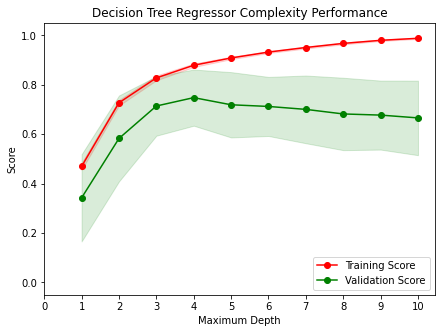

當深度為1時，紅點與綠點的score都約在0.5左右，表示訓練出的模型在測試訓練資料與測試資料的結果都不如預期，與拿來訓練的資料結果太差就表示曲線太過單調，是High Bias(Underfitting)。
當深度為10時，紅點到達接近1.0，綠點卻大概只有0.7左右。表示訓練出的模型在測試訓練資料時大部分預測結果都符合，但測試資料結果卻結果不如預期，是High Variance(Overfitting)。


In [9]:
print("Question 5:")
def model_complexity(X, y):
  """ Calculates the performance of the model as model complexity increases.
      The learning and testing errors rates are then plotted. """

  # Vary the max_depth parameter from 1 to 10
  max_depth = np.arange(1, 11)

  from sklearn.tree import DecisionTreeRegressor

  # Create 10 cross-validation sets for training and testing
  # Calculate the training and testing scores
  from sklearn.model_selection import validation_curve
  train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
                                               param_name="max_depth", param_range=max_depth, cv=10, scoring='r2')

  # Find the mean and standard deviation for smoothing
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the validation curve
  plt.figure(figsize=(7, 5))
  plt.title('Decision Tree Regressor Complexity Performance')
  plt.plot(max_depth, train_mean, 'o-', color='r', label='Training Score')
  plt.plot(max_depth, test_mean, 'o-', color='g', label='Validation Score')
  plt.fill_between(max_depth, train_mean - train_std, \
                   train_mean + train_std, alpha=0.15, color='r')
  plt.fill_between(max_depth, test_mean - test_std, \
                   test_mean + test_std, alpha=0.15, color='g')

  # Visual aesthetics
  plt.legend(loc='lower right')
  plt.xlabel('Maximum Depth')
  plt.ylabel('Score')
  plt.ylim([-0.05, 1.05])
  plt.xticks(np.arange(0, 11, step=1))
  plt.show()

model_complexity(X_train, y_train)
print("當深度為1時，紅點與綠點的score都約在0.5左右，表示訓練出的模型在測試訓練資料與測試資料的結果都不如預期", end='')
print("，與拿來訓練的資料結果太差就表示曲線太過單調，是High Bias(Underfitting)。")
print("當深度為10時，紅點到達接近1.0，綠點卻大概只有0.7左右。表示訓練出的模型在測試訓練資料時大部分預測結果都符合", end='')
print("，但測試資料結果卻結果不如預期，是High Variance(Overfitting)。")

In [10]:
print("Question 6:")
print("在深度為3時是最好的結果，Training Score夠高且Validation Score也很接近Training Score。")

Question 6:
在深度為3時是最好的結果，Training Score夠高且Validation Score也很接近Training Score。


In [11]:
print("Question 7:")
print("k-fold cross-validation是一種驗證訓練模型好壞的方法，k的意思就是將資料分成k組，做k次的試驗。")
print("ex: 共100筆資料，k設為10。第一次以1-10筆作為測試資料，剩下的第11-第100筆作為訓練資料，下一次就是11-20作測試，1-10 & 21-100作為訓練資料，以此類推。")
print("圖形化顯示結果後就能知道模型是Underfitting或Overfitting，做出對應的參數調整(Underfitting:增加複雜度，Overfitting:過度訓練資料)。")

Question 7:
k-fold cross-validation是一種驗證訓練模型好壞的方法，k的意思就是將資料分成k組，做k次的試驗。
ex: 共100筆資料，k設為10。第一次以1-10筆作為測試資料，剩下的第11-第100筆作為訓練資料，下一次就是11-20作測試，1-10 & 21-100作為訓練資料，以此類推。
圖形化顯示結果後就能知道模型是Underfitting或Overfitting，做出對應的參數調整(Underfitting:增加複雜度，Overfitting:過度訓練資料)。


In [12]:
print("Question: Making Predictions")
# TODO: Import 'LinearRegression'
from sklearn.linear_model import LinearRegression
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  # 訓練模型
lr_predict = linear_regressor.predict(X_test)  # 拿X_test到模型中預測
score_lr = performance_metric(y_test, lr_predict)  # y_test與預測出來的數據做比較
print("Linear regression model has a coefficient of determination, R^2, of {:.3f}.".format(score_lr))
# Linear Regression
dt_regressor = DecisionTreeRegressor(max_depth=3)  # Question6推論3為最理想深度
dt_regressor.fit(X_train, y_train)  # 訓練模型
dt_predict = dt_regressor.predict(X_test)  # 拿X_test到模型中預測
score_dt = performance_metric(y_test, dt_predict)  # y_test與預測出來的數據做比較
print("Decision tree regression model has a coefficient of determination, R^2, of {:.3f}.".format(score_dt))

Question: Making Predictions
Linear regression model has a coefficient of determination, R^2, of 0.700.
Decision tree regression model has a coefficient of determination, R^2, of 0.695.


In [13]:
print("Question 8:")
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
         [4, 32, 22], # Client 2
         [8, 3, 12]]  # Client 3
# Apply either one model to show predictions ( decision tree )
for i, price in enumerate(dt_regressor.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Question 8:
Predicted selling price for Client 1's home: $385,603.45
Predicted selling price for Client 2's home: $268,693.67
Predicted selling price for Client 3's home: $923,475.00


Question 9:


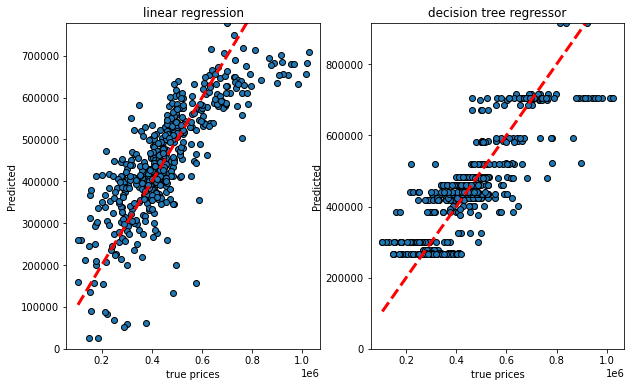

我覺得模型在現實中可以拿來參考用，但不代表真正的結果。真正影響買不買房的因素有更多，也許一棟房子便宜但蓋在風景美麗的地方，有錢人也有可能買這種便宜的別墅。


In [14]:
print("Question 9:")
from sklearn.model_selection import cross_val_predict
# TODO: Use cross validation function to get the predictions of all data
pred_linear_regressor = cross_val_predict(linear_regressor, features, prices)
pred_dt_regressor = cross_val_predict(dt_regressor, features, prices)
# plot a figure of true price vs. prediction for both models
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].set_title("linear regression")
ax[0].scatter(prices, pred_linear_regressor, edgecolors=(0, 0, 0))
ax[0].plot([prices.min(), prices.max()], [prices.min(), prices.max()], 'r--', lw=3)
ax[0].set_ylim([0, pred_linear_regressor.max()])
ax[0].set_xlabel('true prices')
ax[0].set_ylabel('Predicted')

ax[1].set_title("decision tree regressor")
ax[1].scatter(prices, pred_dt_regressor, edgecolors=(0, 0, 0))
ax[1].plot([prices.min(), prices.max()], [prices.min(), prices.max()], 'r--', lw=3)
ax[1].set_ylim([0, pred_dt_regressor.max()])
ax[1].set_xlabel('true prices')
ax[1].set_ylabel('Predicted')
plt.show()
print("我覺得模型在現實中可以拿來參考用，但不代表真正的結果。真正影響買不買房的因素有更多", end='')
print("，也許一棟房子便宜但蓋在風景美麗的地方，有錢人也有可能買這種便宜的別墅。")